In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
# load predicted values from the previous 6-fold cross-validation as df
m2v_xgboost_p_1 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_p_fold_1.csv')
m2v_xgboost_p_2 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_p_fold_2.csv')
m2v_xgboost_p_3 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_p_fold_3.csv')
m2v_xgboost_p_4 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_p_fold_4.csv')
m2v_xgboost_p_5 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_p_fold_5.csv')
m2v_xgboost_p_6 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_p_fold_6.csv')
# concat the data, rename columns (actual=experimentally determined value)
m2v_xgboost_p = pd.concat((m2v_xgboost_p_1, m2v_xgboost_p_2, m2v_xgboost_p_3, m2v_xgboost_p_4, m2v_xgboost_p_5, m2v_xgboost_p_6), axis=0)
m2v_xgboost_p = m2v_xgboost_p.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(m2v_xgboost_p['actual'], m2v_xgboost_p['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(m2v_xgboost_p['actual'], m2v_xgboost_p['predict'])))

# R^2 Coefficient of Determination
print(r2_score(m2v_xgboost_p['actual'], m2v_xgboost_p['predict']))

2.2651004319659593
3.1214938593579924
0.4786574762242838


In [4]:
len(m2v_xgboost_p)

1183

In [5]:
# calculate the residual value for each molecule
m2v_xgboost_p['residual']= m2v_xgboost_p['predict']-m2v_xgboost_p['actual']

In [6]:
# calculate standardised deviation of the residuals (sdr) of the dataset
# equations used: sdr = sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((m2v_xgboost_p['residual']**2).sum()/(len(m2v_xgboost_p)-2))
sdr

3.1241358351668387

In [7]:
# calculate how many sdr each molecule's predicted value is away from the exp value 
m2v_xgboost_p['std_residual'] = m2v_xgboost_p['residual']/sdr
m2v_xgboost_p['std_residual']

0     -0.474775
1      0.510641
2     -1.584809
3      0.893492
4      0.531239
         ...   
192   -1.753029
193   -0.068208
194   -0.005412
195   -0.398196
196   -0.822221
Name: std_residual, Length: 1183, dtype: float64

In [8]:
m2v_xgboost_p.to_csv('m2v_xgboost_p.csv')
m2v_xgboost_p

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
0,0,10,10,10,COC(CC(OC)OC)OC,10,7.1,5.616737,-1.483263,-0.474775
1,1,23,23,23,FC(F)=C,23,5.7,7.295312,1.595312,0.510641
2,2,31,31,31,ClCC(Cl)CCl,31,12.3,7.348840,-4.951160,-1.584809
3,3,44,44,44,CCc1ccccc1CC,44,0.1,2.891391,2.791391,0.893492
4,4,49,49,49,SCCS,49,7.2,8.859663,1.659663,0.531239
...,...,...,...,...,...,...,...,...,...,...
192,192,1130,1132,1130,CCO[P](=O)(OCC)OCC,1130,11.4,5.923298,-5.476702,-1.753029
193,193,1153,1157,1153,CCCCOC=C,1153,4.1,3.886909,-0.213091,-0.068208
194,194,1154,1158,1154,CCCCSC=C,1154,5.0,4.983092,-0.016908,-0.005412
195,195,1157,1161,1157,ClC=C,1157,6.5,5.255981,-1.244019,-0.398196


In [9]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
m2v_xgboost_p_outliers = m2v_xgboost_p.loc[abs(m2v_xgboost_p['std_residual']) > n]
len(m2v_xgboost_p_outliers)

14

In [10]:
m2v_xgboost_p_outliers.to_csv('m2v_xgboost_p_outliers3.csv')

In [11]:
m2v_xgboost_p_outliers

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
39,39,243,243,243,ClC(Cl)(Cl)C=C,243,15.5,3.702320,-11.797680,-3.776302
123,123,732,733,732,OCC(O)CO.OC(O)=O,732,25.5,12.890422,-12.609578,-4.036181
196,196,1175,1179,1175,O=C1OC=CO1,1175,18.1,6.315643,-11.784357,-3.772037
51,51,316,316,316,O=C1C(=O)c2ccccc2c3ccccc13,316,17.1,7.598466,-9.501534,-3.041332
69,69,405,405,405,ClB(Cl)Cl,405,2.5,11.979514,9.479514,3.034284
127,127,724,725,724,NC=O,724,26.2,11.636869,-14.563131,-4.661491
2,2,7,7,7,CC(Cl)=C(Cl)Cl,7,15.7,6.024704,-9.675296,-3.096951
176,176,1091,1093,1091,s1ccnc1,1091,18.8,6.483014,-12.316986,-3.942526
81,81,473,473,473,[Ca++].NC#N,473,27.6,12.323998,-15.276003,-4.889673
188,188,1107,1109,1107,C/C=C/C#N,1107,18.8,6.834498,-11.965502,-3.830020


In [18]:
# Set the default text font size
plt.rc('font', size=22)

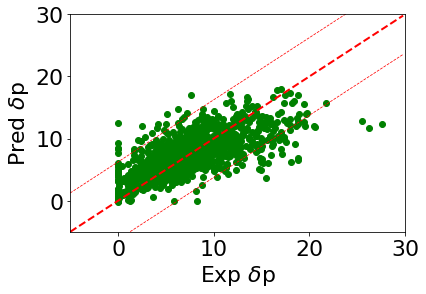

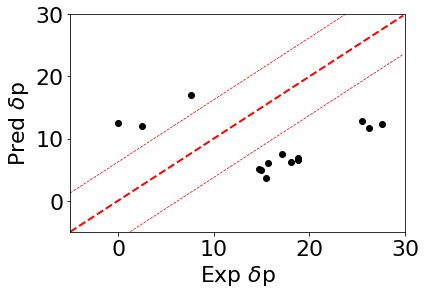

In [19]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 3 srd (n=3) away from the ideal agreement. 
ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_p['actual'], y=m2v_xgboost_p['predict'], color='green')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 3 srd
ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_p_outliers['actual'], y=m2v_xgboost_p_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])

plt.show()

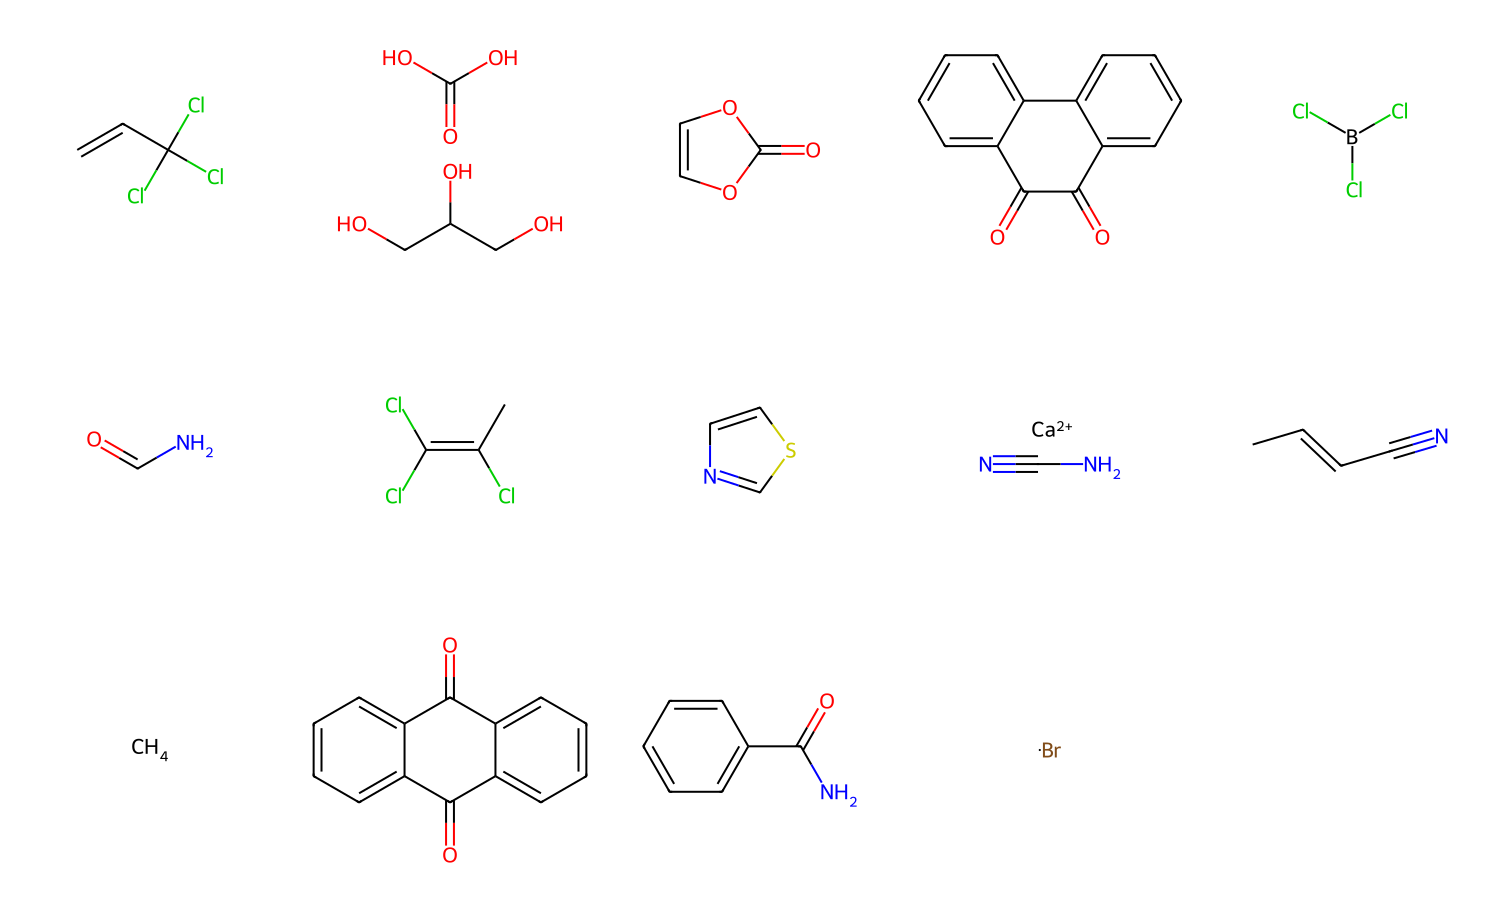

In [20]:
# draw n=3 outlier structure
outliners = [Chem.MolFromSmiles(x) for x in m2v_xgboost_p_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [21]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
m2v_xgboost_p_outliers2 = m2v_xgboost_p.loc[abs(m2v_xgboost_p['std_residual']) > n]
len(m2v_xgboost_p_outliers2)

70

In [22]:
m2v_xgboost_p_outliers2

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
32,32,209,209,209,N#Cc1occc1,209,15.0,8.750589,-6.249411,-2.000365
39,39,243,243,243,ClC(Cl)(Cl)C=C,243,15.5,3.702320,-11.797680,-3.776302
44,44,274,274,274,Cc1ccon1,274,14.8,6.911848,-7.888152,-2.524907
65,65,381,381,381,[nH]1cnc2ccccc12,381,14.9,6.640015,-8.259985,-2.643926
67,67,394,394,394,CCCCOC(=O)c1ccccc1C(=O)OCc2ccccc2,394,11.2,4.747879,-6.452120,-2.065250
...,...,...,...,...,...,...,...,...,...,...
113,113,729,730,729,O=Cc1occc1,729,14.9,8.316562,-6.583438,-2.107283
130,130,815,817,815,CC(=C)C(O)=O,815,2.8,10.208801,7.408801,2.371472
131,131,819,821,819,CO,819,5.0,12.299445,7.299445,2.336469
138,138,860,862,860,C[S](=O)(=O)c1ccccc1,860,16.9,10.012118,-6.887882,-2.204732


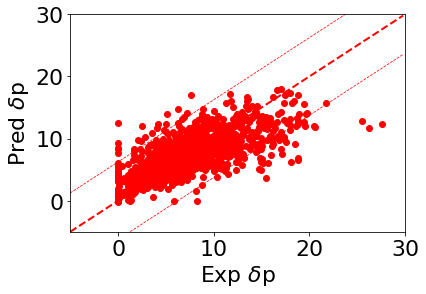

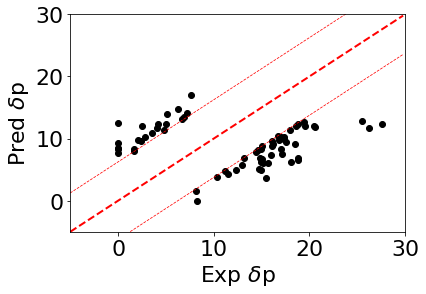

In [23]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 2 srd (n=2) away from the ideal agreement. 
ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_p['actual'], y=m2v_xgboost_p['predict'], color='red')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 2 srd
ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_p_outliers2['actual'], y=m2v_xgboost_p_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])
plt.show()

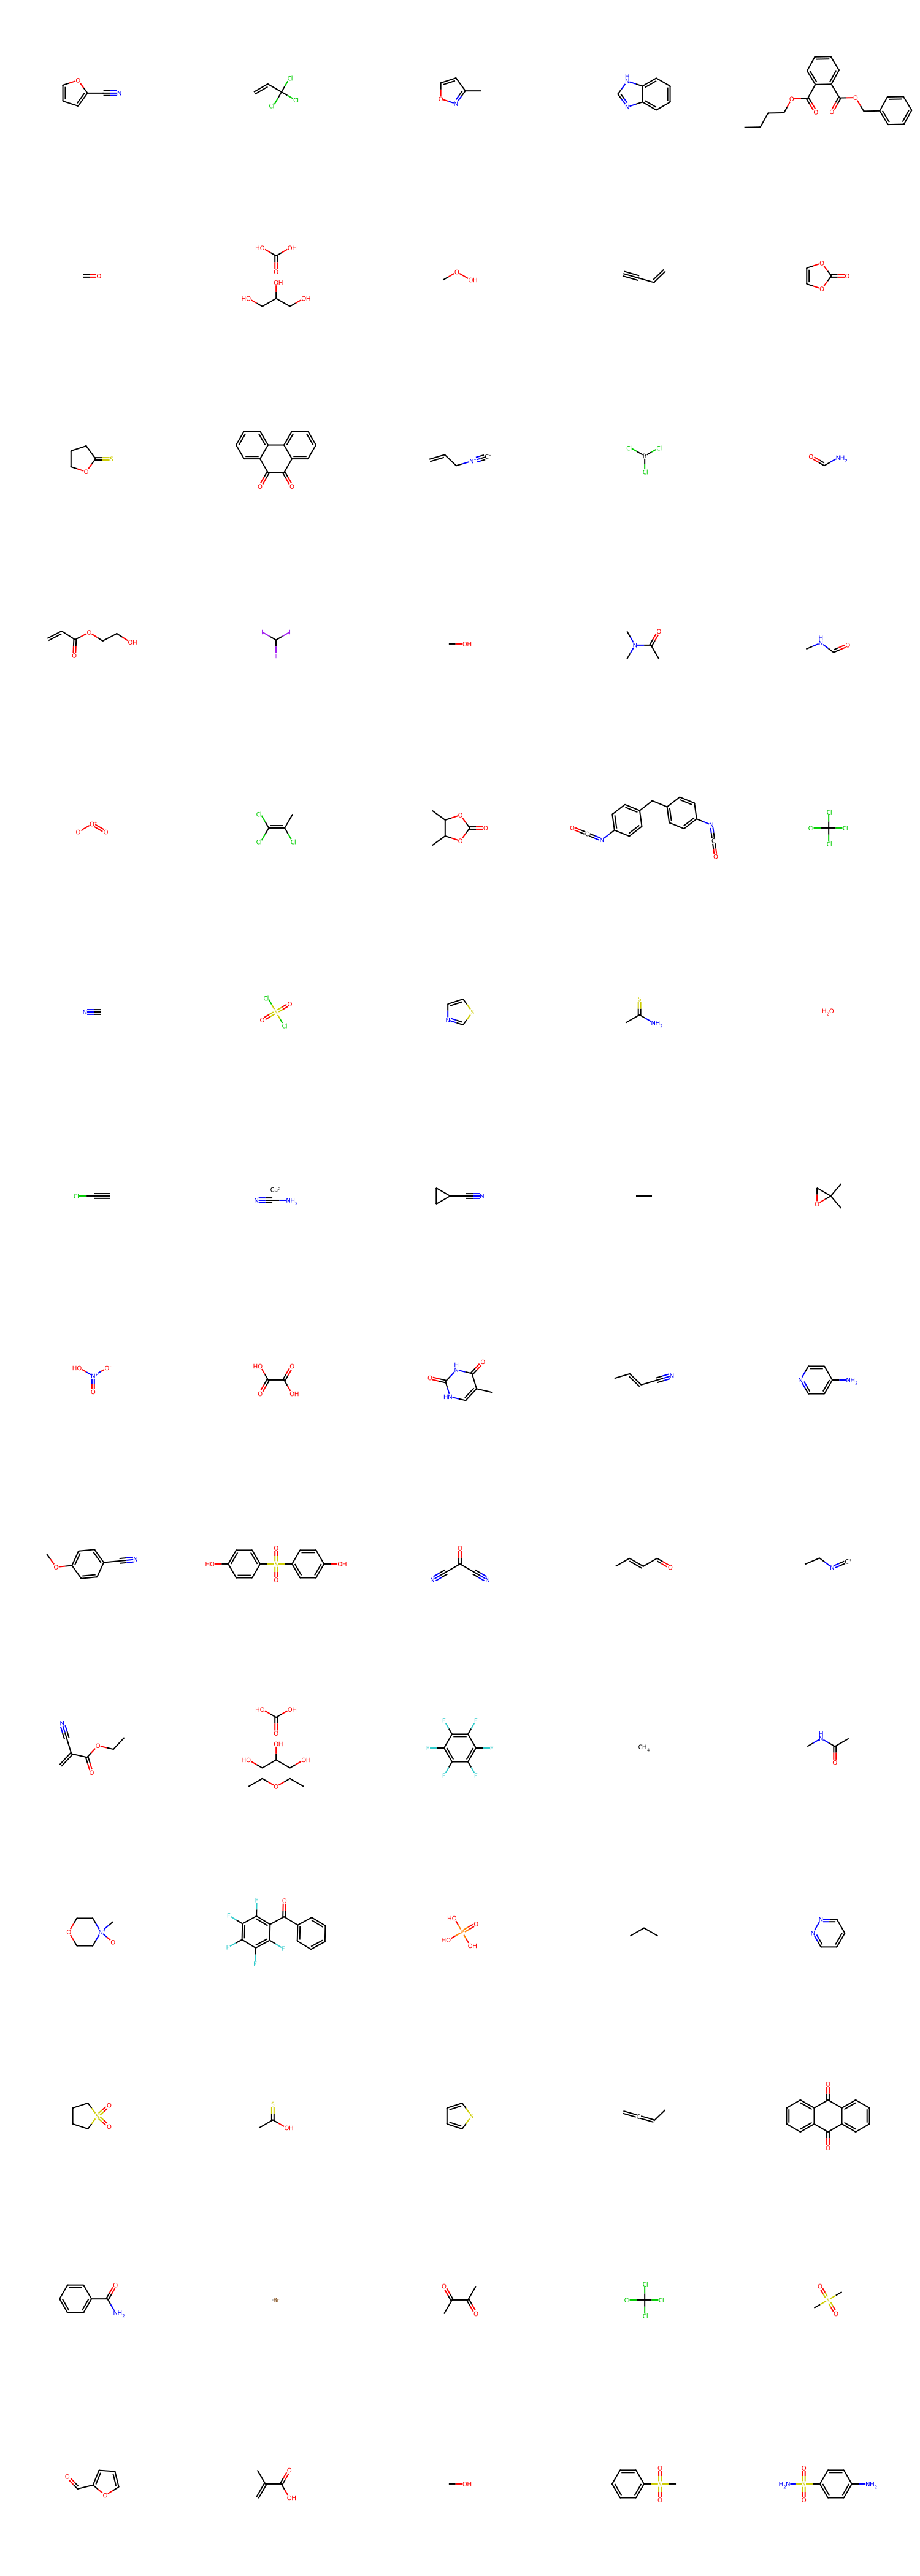

In [24]:
# draw n=2 outlier structure
outliners2 = [Chem.MolFromSmiles(x) for x in m2v_xgboost_p_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [25]:
# save outliers (n=2) info to a csv file
m2v_xgboost_p_outliers2.to_csv('m2v_xgboost_p_outliers2.csv')

In [26]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in m2v_xgboost_p_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
108.44391265597528


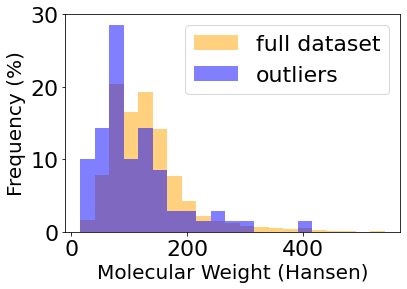

In [27]:
# plot molecular weight distribution for the full dataset and the outliers
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()